In [1]:
options(repr.plot.width  = 15, repr.plot.height = 10)

# Libraries

In [2]:
library(dplyr)
library(rpart)
library(gridExtra)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




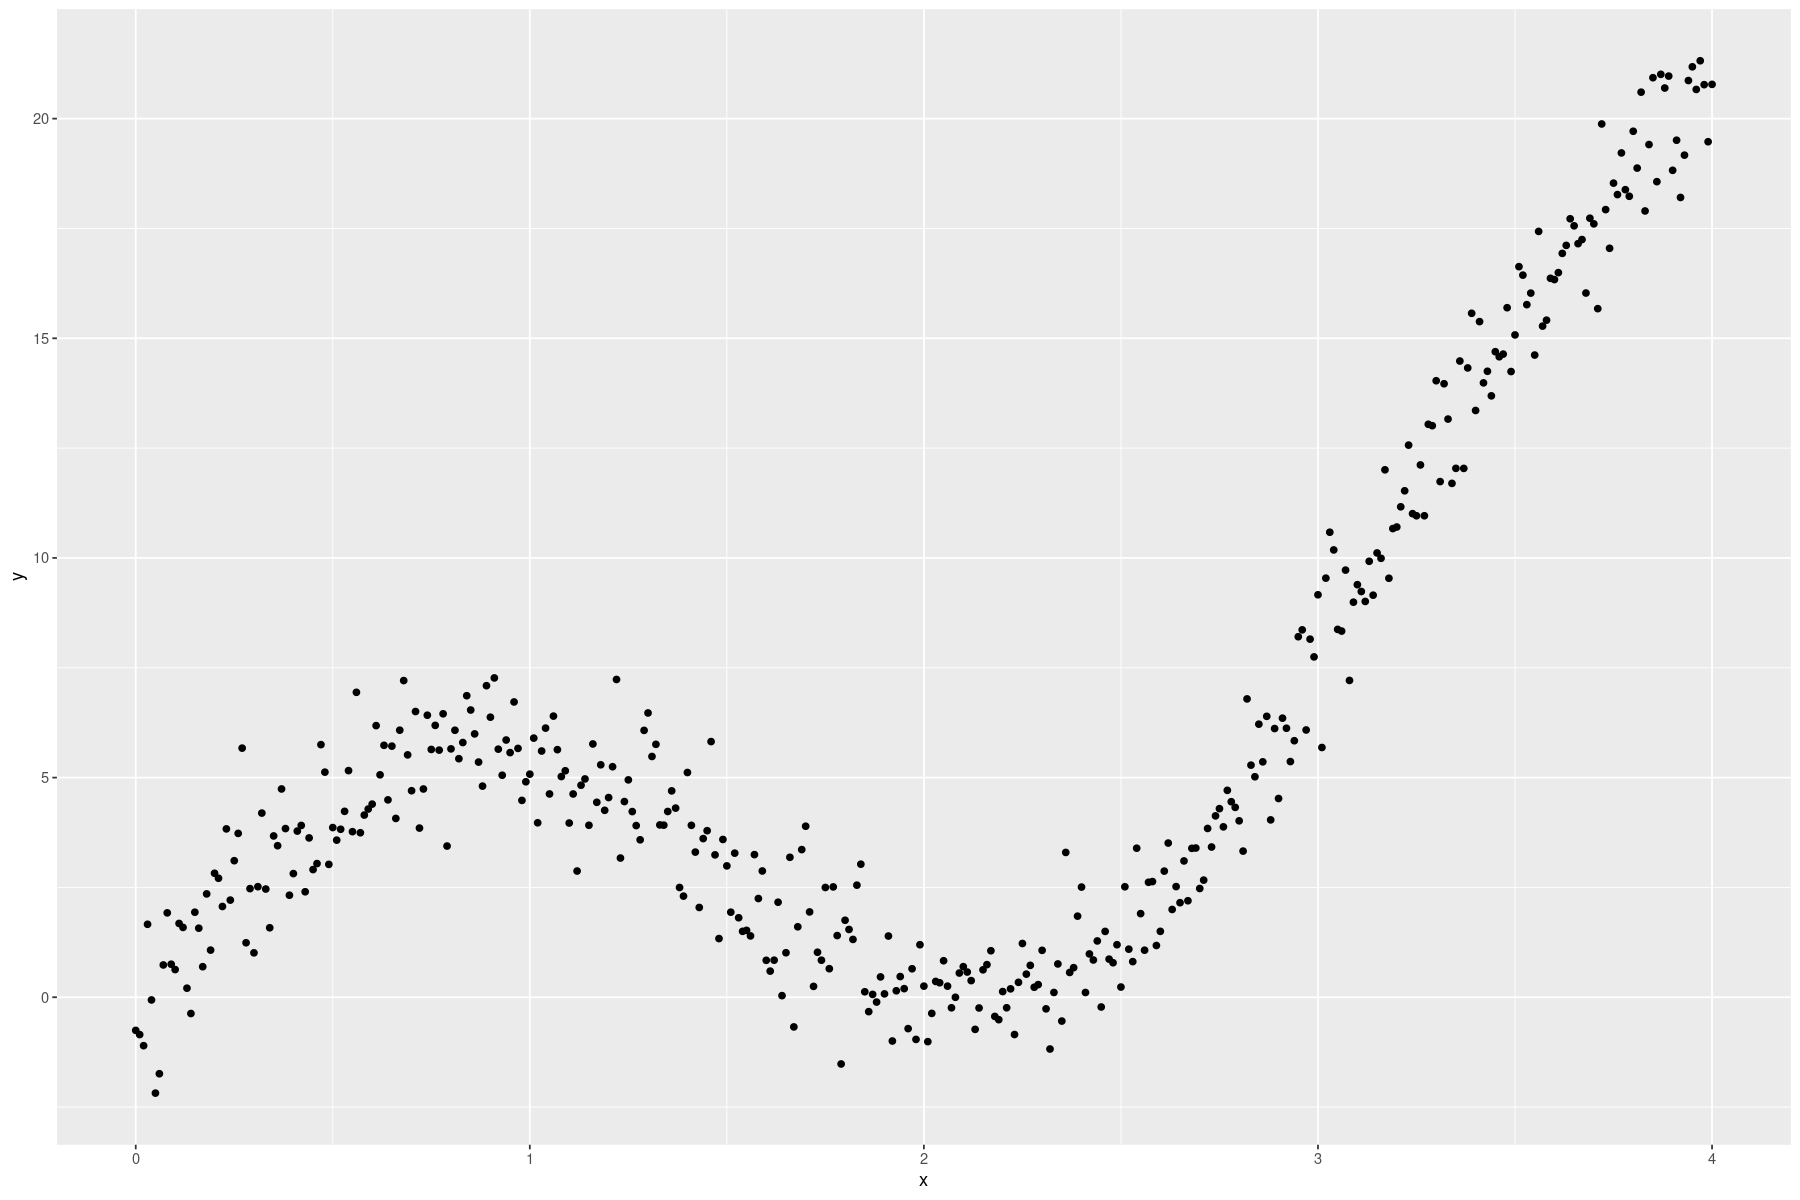

In [3]:
x <- seq(0, 4, 0.01)
noise <- rnorm(length(x))
data_fake <- data.frame(
    x = x,
    y = x**2 + 5*sin(x*2) + noise,
    noise = noise
)
p1 <- data_fake %>% ggplot(aes(x, y)) + geom_point()
p1

In [4]:
lr = 1
max_depth = 2

In [5]:
weak_learner1 = rpart(y ~ x, data = data_fake, maxdepth=max_depth)

data_fake <- data_fake %>% 
    mutate(pred1 = predict(weak_learner1, data_fake),
           predT1 = lr * predict(weak_learner1, data_fake),
           error1 = y - predT1
          )

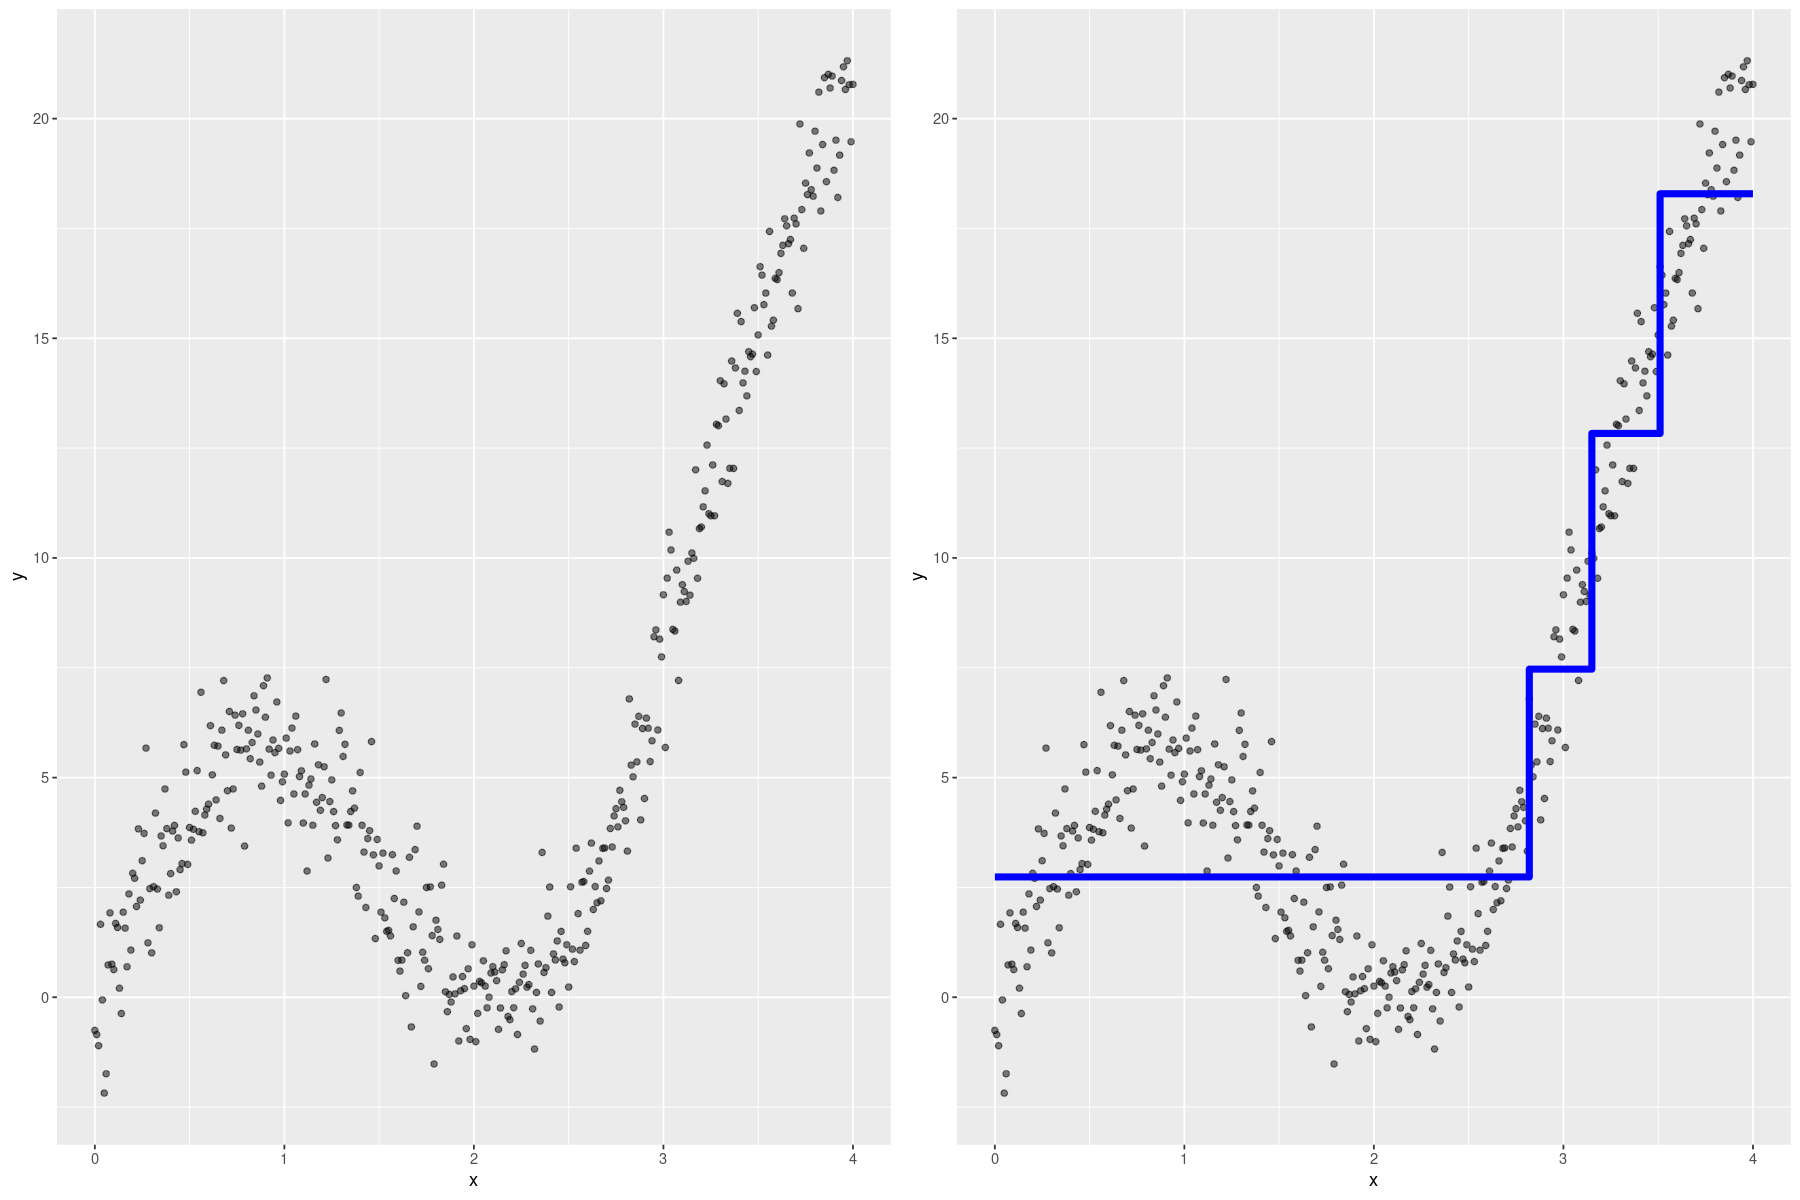

In [6]:
p1 <- data_fake %>% 
    ggplot(aes(x, y)) +
        geom_point(alpha=0.5)
        
p2 <- data_fake %>% 
    ggplot(aes(x, y)) +
        geom_point(alpha=0.5) + 
        geom_step(aes(x, (predT1)), color = 'blue', size=2) 


grid.arrange(p1, p2, nrow = 1)

In [7]:
weak_learner2 = rpart((error1) ~ x, data = data_fake, maxdepth=max_depth)
data_fake <- data_fake %>% 
    mutate(pred2 = predict(weak_learner2, data_fake),
           predT2 = lr * (predict(weak_learner1, data_fake) +
                    predict(weak_learner2, data_fake)),
           error2 = y - predT2)



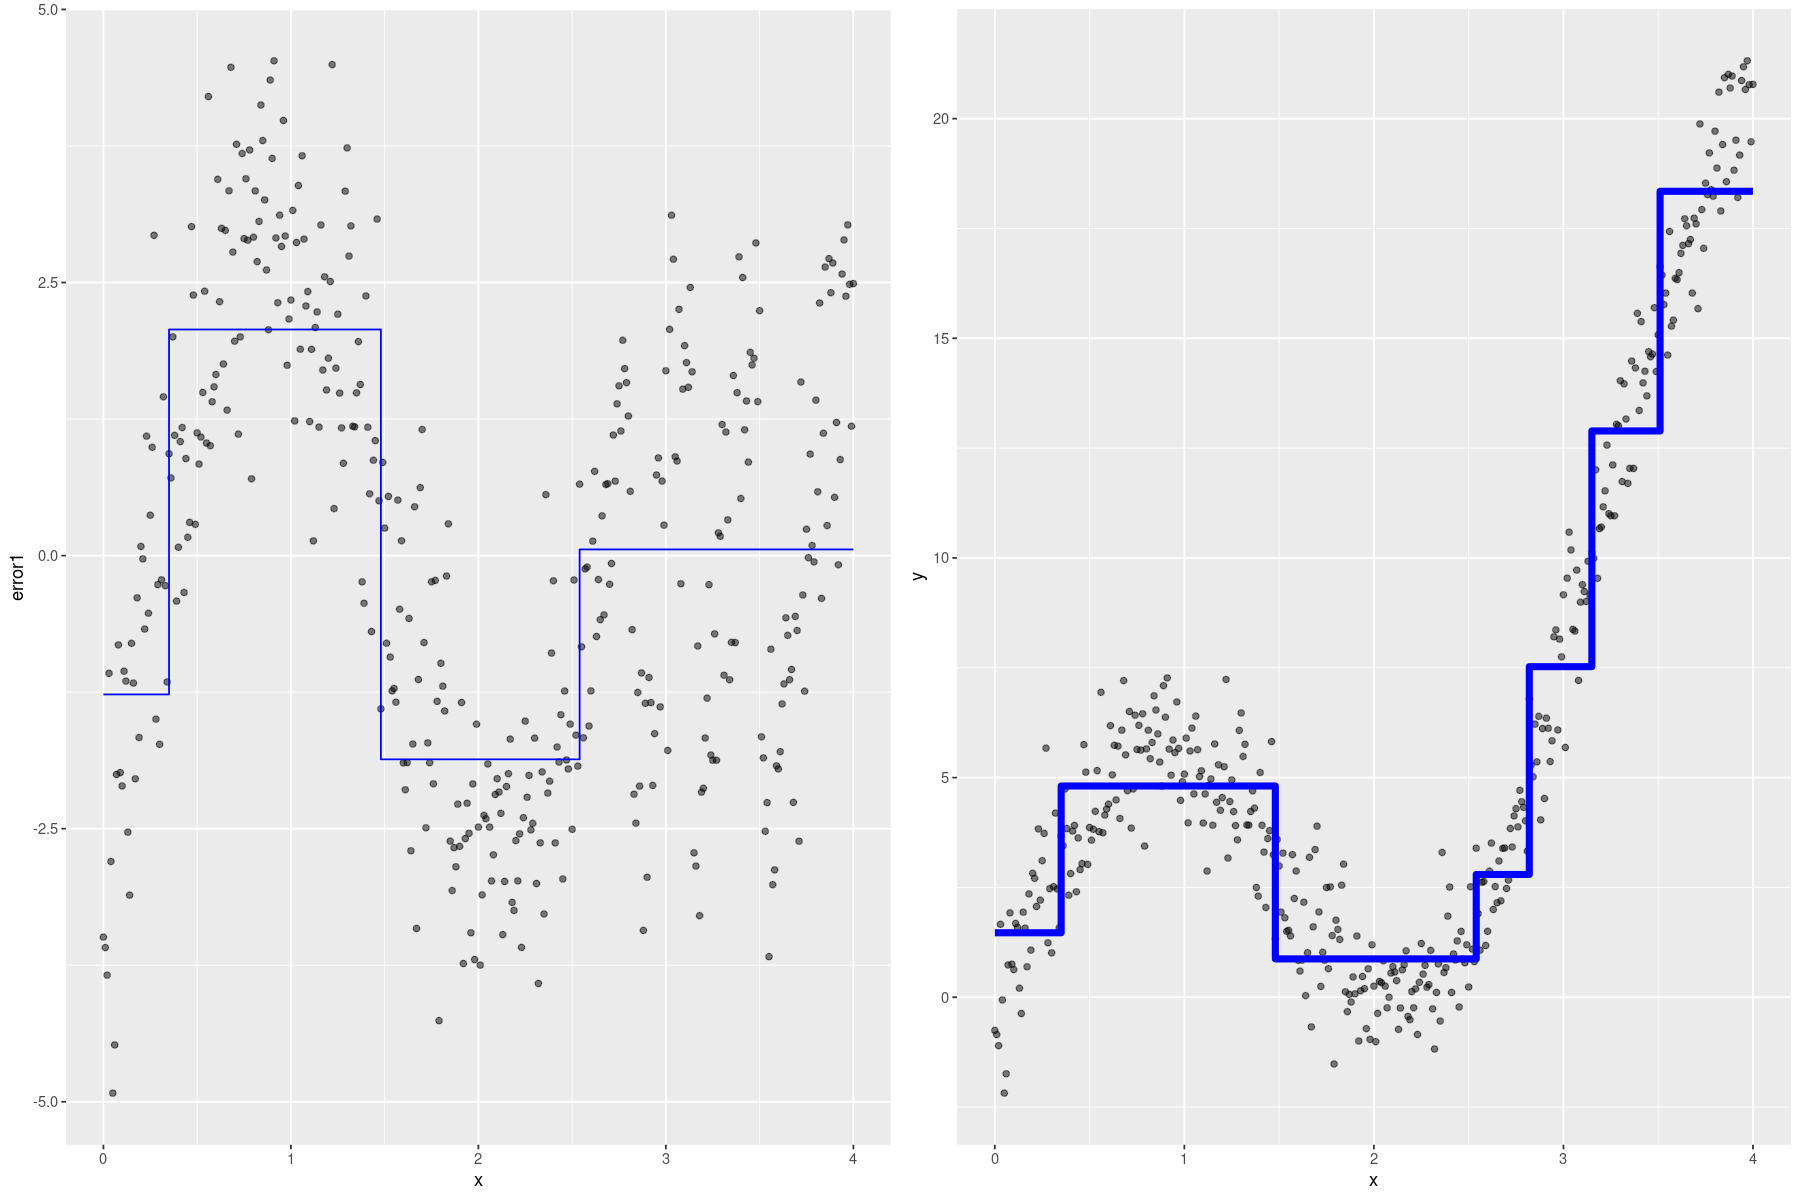

In [8]:
p1 <- data_fake %>% 
    ggplot(aes(x, error1)) +
        geom_point(alpha=0.5) + 
        geom_step(aes(x, (pred2)), color = 'blue') 
        
p2 <- data_fake %>% 
    ggplot(aes(x, y)) +
        geom_point(alpha=0.5) +
        geom_step(aes(x, (predT2)), color = 'blue', size=2) 

grid.arrange(p1, p2, nrow = 1)

In [9]:
weak_learner3 = rpart((error2) ~ x, data = data_fake, maxdepth=max_depth)

data_fake <- data_fake %>% 
    mutate(pred3 = predict(weak_learner3, data_fake),
           predT3 = lr * (predict(weak_learner1, data_fake) +
                          predict(weak_learner2, data_fake) +
                          predict(weak_learner3, data_fake)),
           error3 = y - predT3)

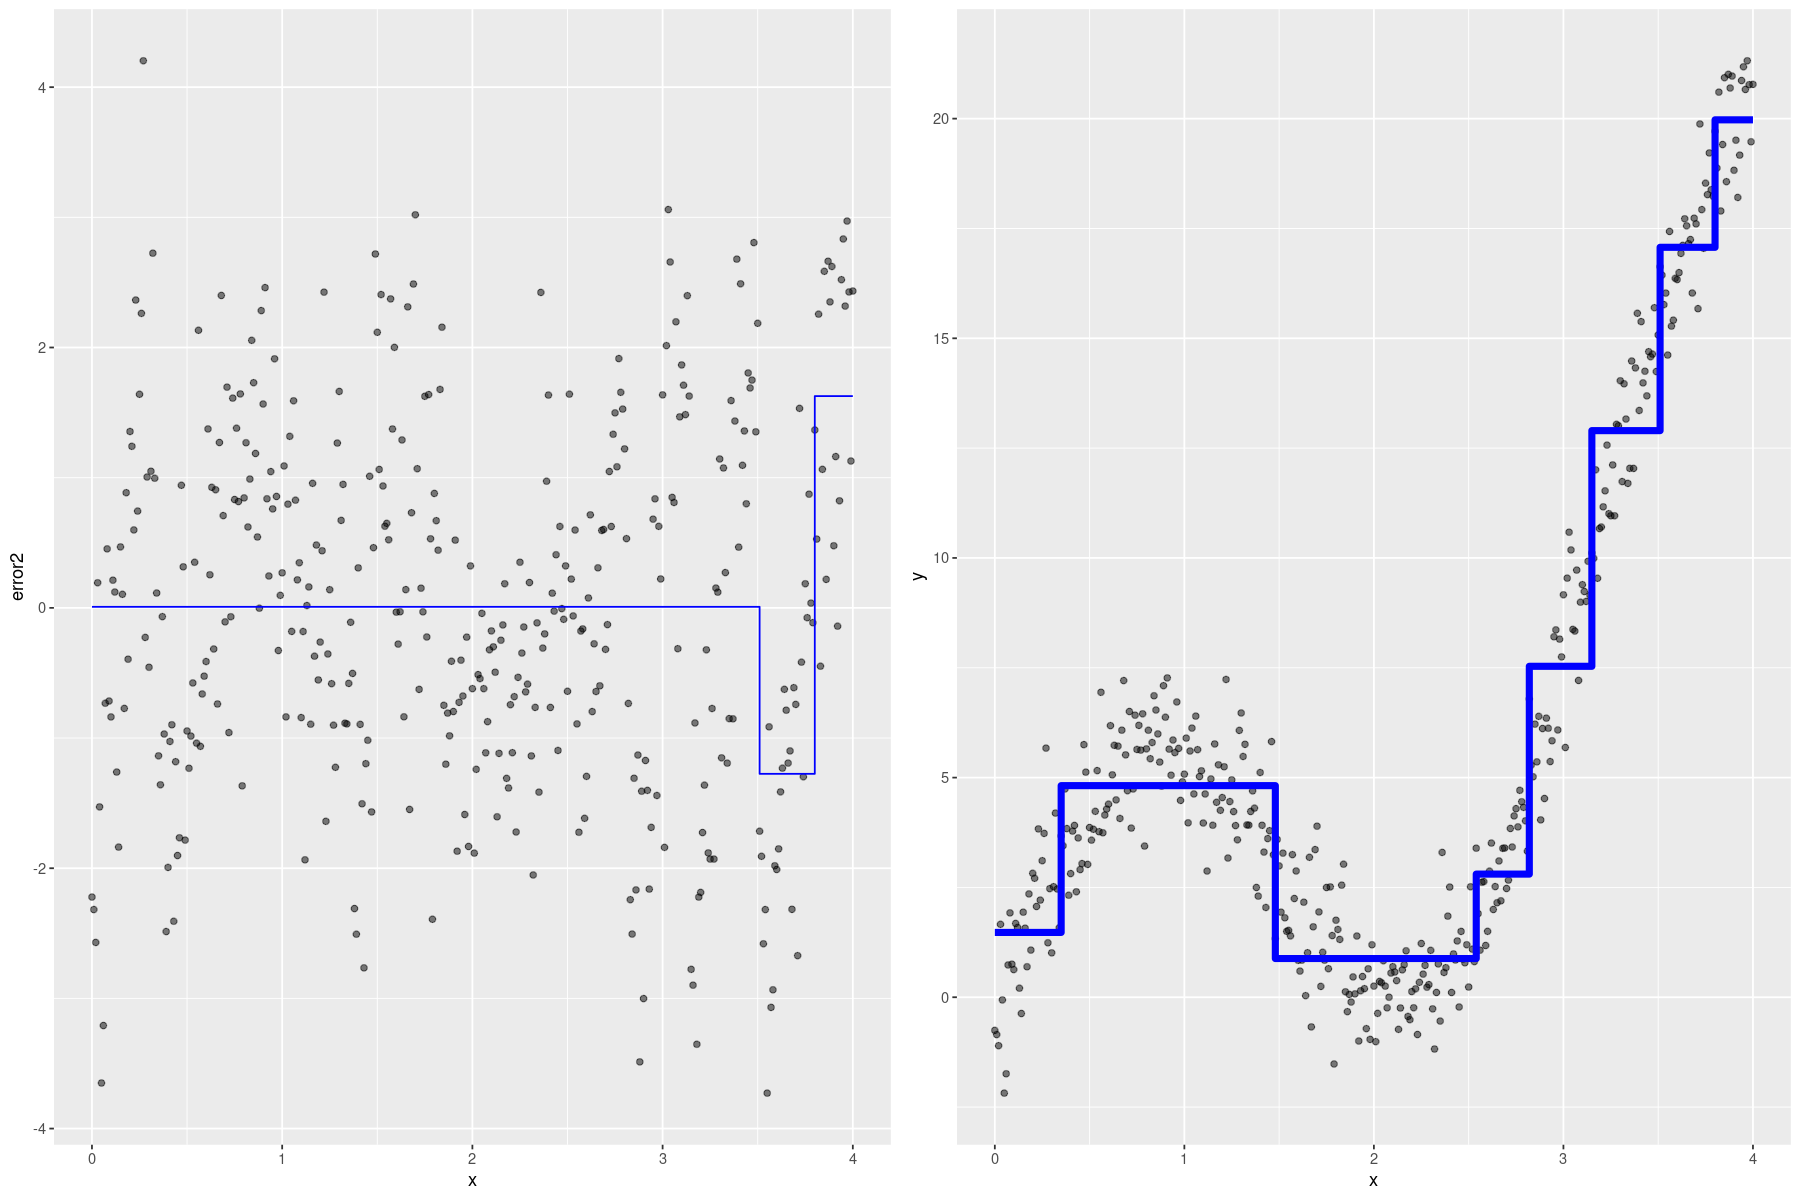

In [10]:
p1 <- data_fake %>% 
    ggplot(aes(x, error2)) +
        geom_point(alpha=0.5) + 
        geom_step(aes(x, (pred3)), color = 'blue') 
        
p2 <- data_fake %>% 
    ggplot(aes(x, y)) +
        geom_point(alpha=0.5) +
        geom_step(aes(x, (predT3)), color = 'blue', size=2) 

grid.arrange(p1, p2, nrow = 1)

In [11]:
weak_learner4 = rpart((error3) ~ x, data = data_fake, maxdepth=max_depth)

data_fake <- data_fake %>% 
    mutate(pred4 = predict(weak_learner4, data_fake),
           predT4 = lr * (predict(weak_learner1, data_fake) +
                          predict(weak_learner2, data_fake) +
                          predict(weak_learner3, data_fake) + 
                          predict(weak_learner4, data_fake)),
           error4 = y - predT4)

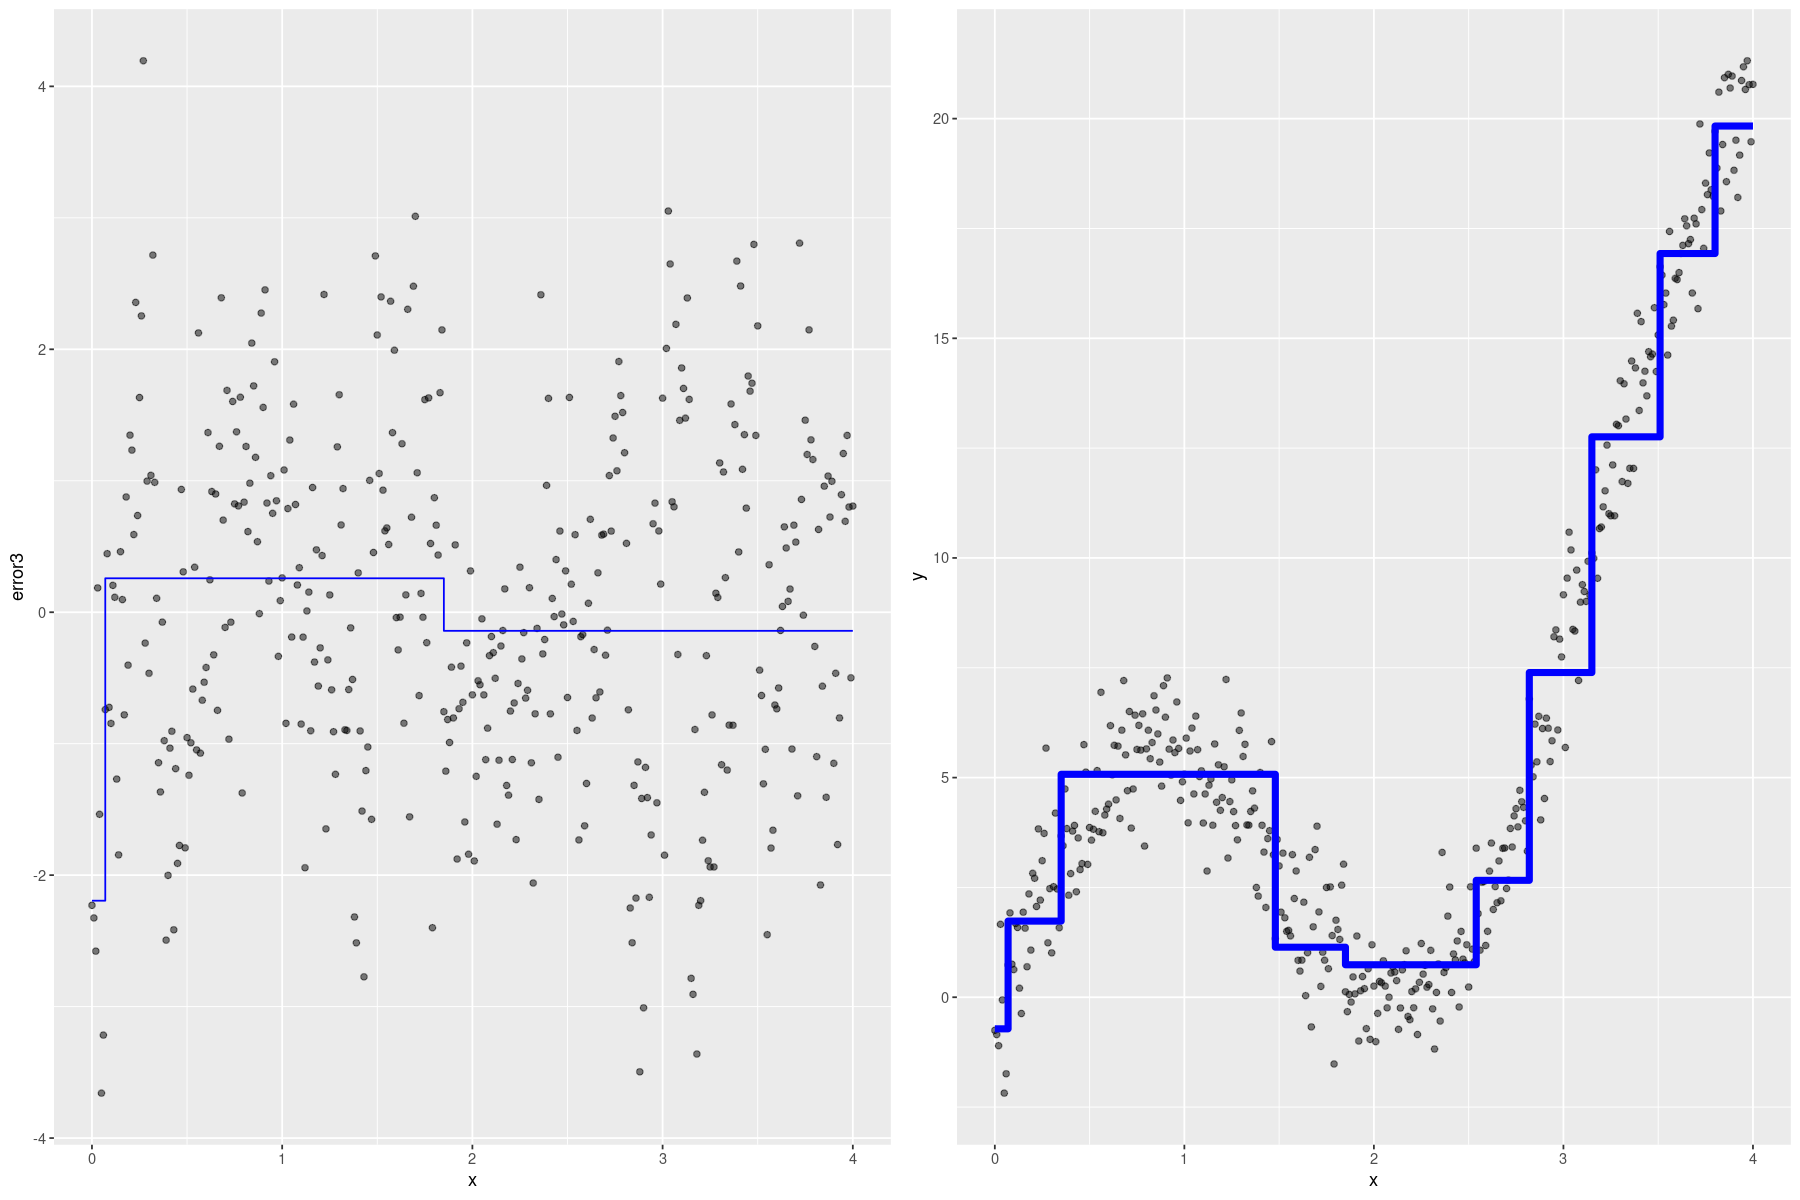

In [12]:
p1 <- data_fake %>% 
    ggplot(aes(x, error3)) +
        geom_point(alpha=0.5) + 
        geom_step(aes(x, (pred4)), color = 'blue') 
        
p2 <- data_fake %>% 
    ggplot(aes(x, y)) +
        geom_point(alpha=0.5) +
        geom_step(aes(x, (predT4)), color = 'blue', size=2) 

grid.arrange(p1, p2, nrow = 1)